<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Research-Question" data-toc-modified-id="Research-Question-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Research Question</a></span></li><li><span><a href="#Data-preperation" data-toc-modified-id="Data-preperation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preperation</a></span></li><li><span><a href="#Build-the-network" data-toc-modified-id="Build-the-network-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Build the network</a></span><ul class="toc-item"><li><span><a href="#Complete-Network" data-toc-modified-id="Complete-Network-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Complete Network</a></span></li><li><span><a href="#Complete-Network-(without-edges)" data-toc-modified-id="Complete-Network-(without-edges)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Complete Network (without edges)</a></span></li><li><span><a href="#topN-Stations-Network" data-toc-modified-id="topN-Stations-Network-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>topN Stations Network</a></span></li></ul></li><li><span><a href="#Analyze-the-network" data-toc-modified-id="Analyze-the-network-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analyze the network</a></span><ul class="toc-item"><li><span><a href="#Basic-concepts-and-definitions" data-toc-modified-id="Basic-concepts-and-definitions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Basic concepts and definitions</a></span></li></ul></li><li><span><a href="#References:" data-toc-modified-id="References:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>References:</a></span></li></ul></div>

# Bike Network Analysis

## Research Question

## Data preperation

In [1]:
import os, sys
os.chdir("..")
sys.path.append(os.getcwd())

In [2]:
from preprocessor.network_loader import NetworkLoader
from preprocessor.map_loader import MapLoader
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx

sns.set("poster")
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
network_loader = NetworkLoader()
nodes, edges = network_loader.nodes, network_loader.edges
xmin, xmax, ymin, ymax = network_loader.min_max_nodes
geodata_nyc = MapLoader().data

## Build the network
### Complete Network

In [16]:
xmin = min([tpl[0] for tpl in nodes.values()])
ymin = min([tpl[1] for tpl in nodes.values()])
xmax = max([tpl[0] for tpl in nodes.values()])
ymax = max([tpl[1] for tpl in nodes.values()])

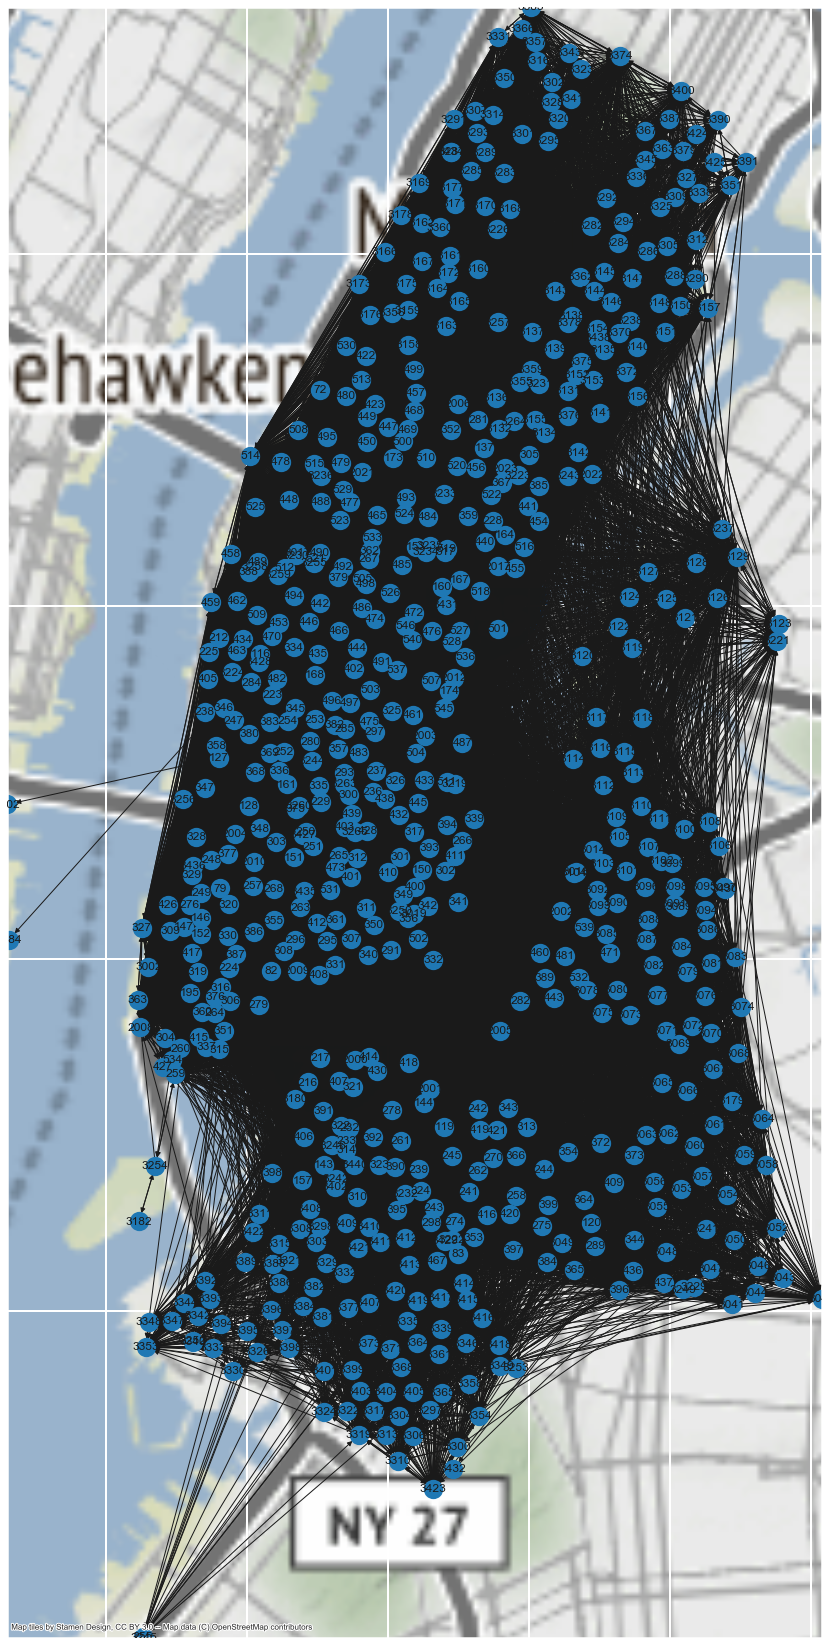

In [9]:
G1 = nx.DiGraph()
G1.add_nodes_from(nodes)
G1.add_edges_from(edges)

fig, ax = plt.subplots(figsize=(30,30))

# add open street map of NYC as basemap to Networkx graph
basemap = geodata_nyc.plot(alpha=0, ax=ax)
ctx.add_basemap(basemap)

# add Networkx graph
nx.draw_networkx(G1, ax=ax, pos=nodes)

plt.xlim((xmin, xmax))
plt.ylim((ymin, ymax))

plt.show()

### Complete Network (without edges)

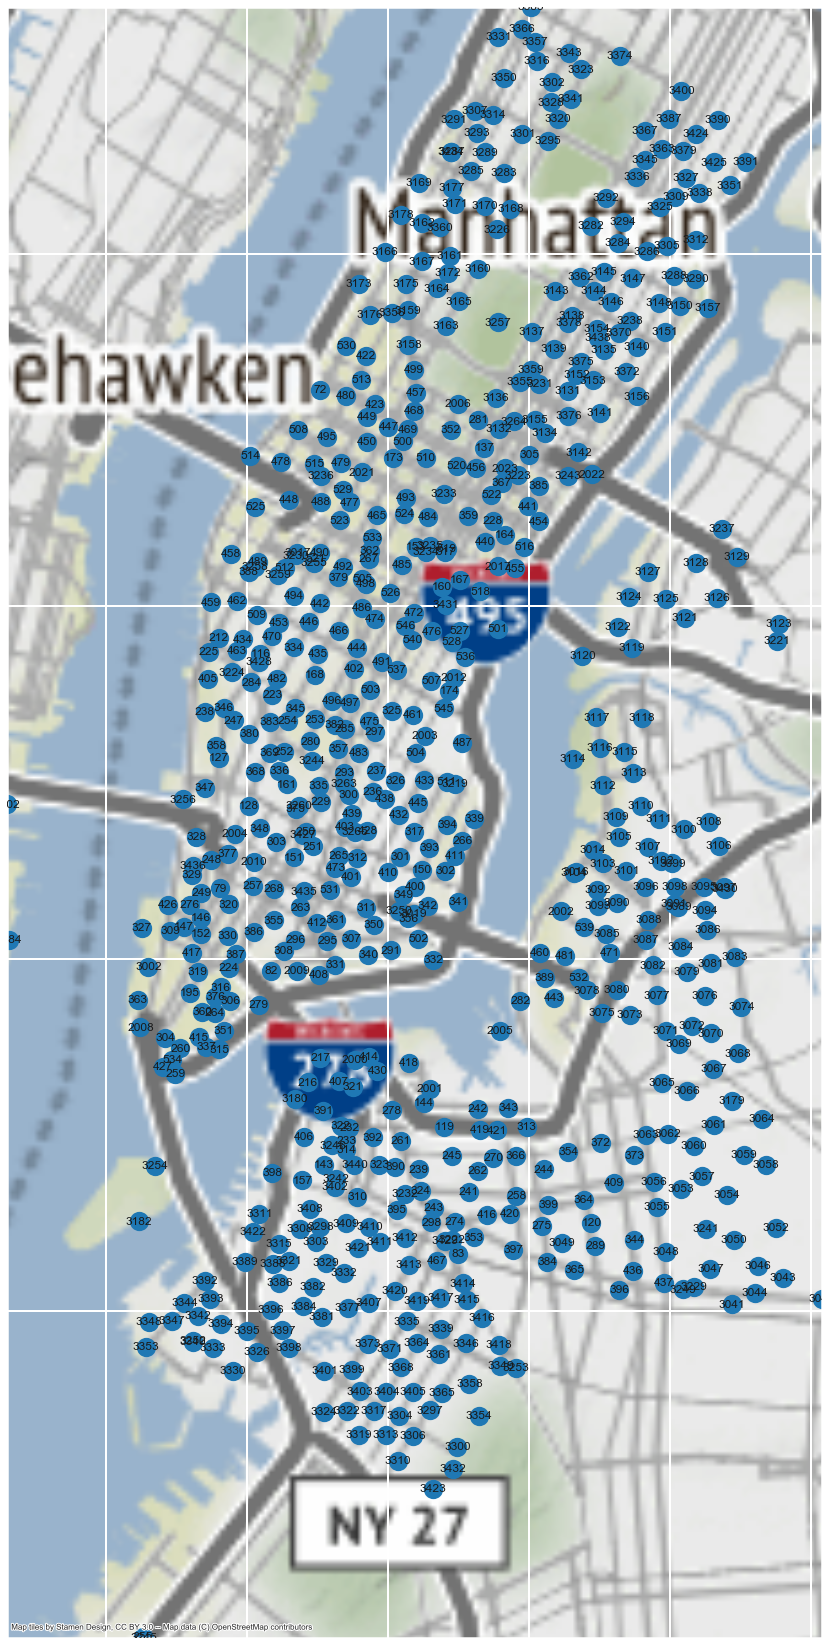

In [8]:
G2 = nx.DiGraph()
G2.add_nodes_from(nodes)
# G2.add_edges_from(edges)

fig, ax = plt.subplots(figsize=(30,30))

# add open street map of NYC as basemap to Networkx graph
basemap = geodata_nyc.plot(alpha=0, ax=ax)
ctx.add_basemap(basemap)

# add Networkx graph
nx.draw_networkx(G2, ax=ax, pos=nodes)

plt.xlim((xmin, xmax))
plt.ylim((ymin, ymax))

plt.show()

### topN Stations Network

In [10]:
centrality_indegree = nx.in_degree_centrality(G1)
sorted_stations = sorted(centrality_indegree.items(),
                         key=lambda x: x[1],
                         reverse=True)

N = 30
top_stations = set([x[0] for x in sorted_stations[0:N]])

nodes_topN = {key: value for (key,value) 
               in nodes.items() 
               if key in top_stations}

edges_topN = [tuple for tuple 
               in edges 
               if (tuple[0] in top_stations) & 
               (tuple[1] in top_stations)]

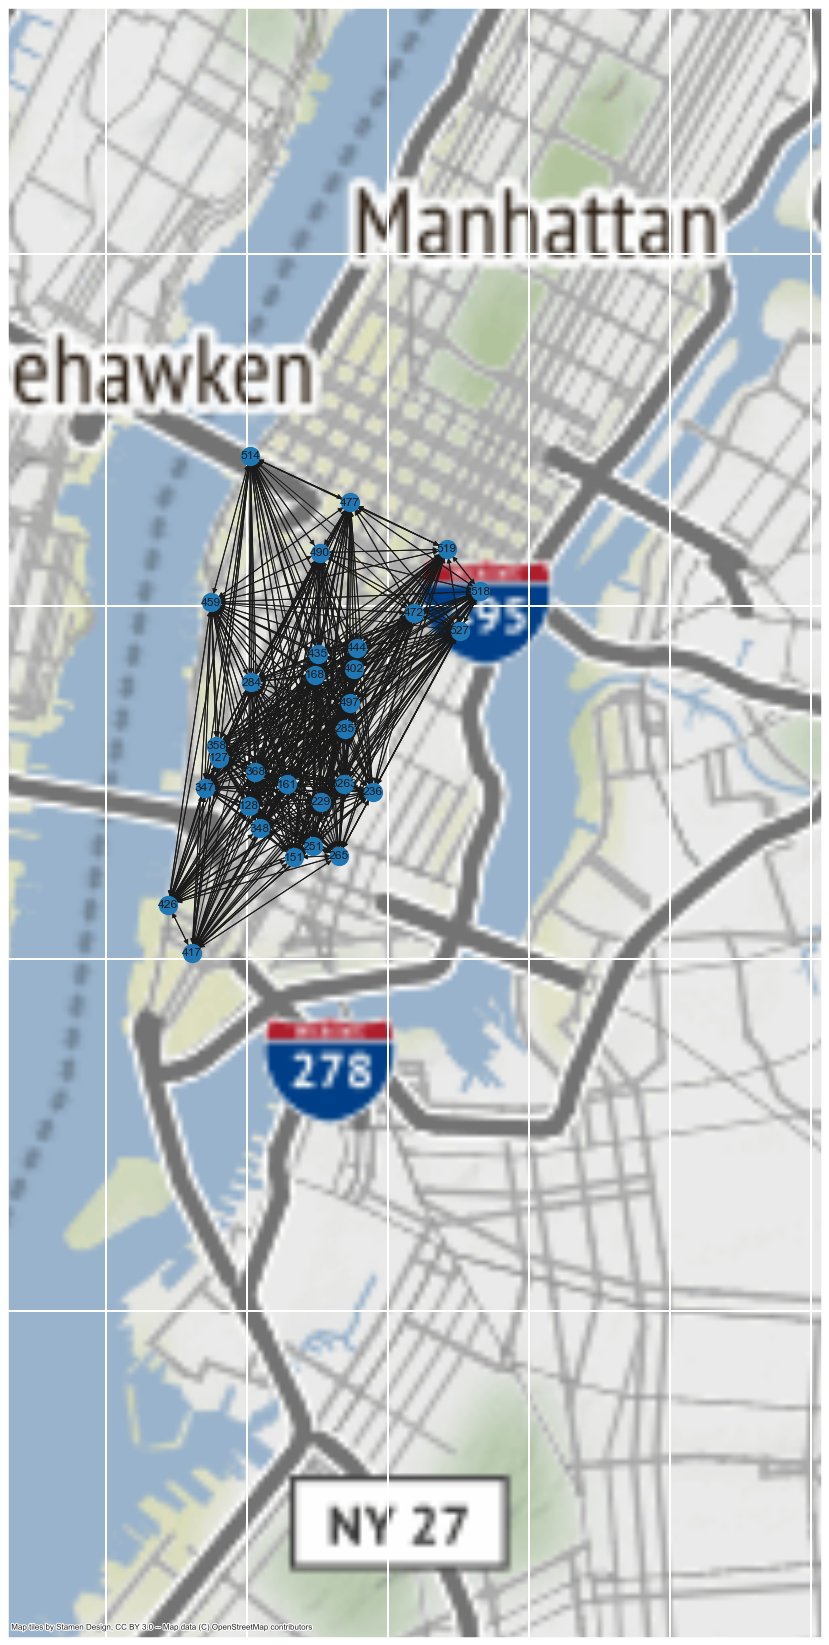

In [18]:
G3 = nx.DiGraph()
G3.add_nodes_from(nodes_topN)
G3.add_edges_from(edges_topN)

fig, ax = plt.subplots(figsize=(30,30))

# add open street map of NYC as basemap to Networkx graph
basemap = geodata_nyc.plot(alpha=0, edgecolor="k", ax=ax)
ctx.add_basemap(basemap)

# add Networkx graph
nx.draw_networkx(G3, ax=ax, pos=nodes_topN)

plt.xlim((xmin, xmax))
plt.ylim((ymin, ymax))

plt.show()

## Analyze the network

### Basic concepts and definitions
- adjacency matrix
- paths
- connected components

* Centrality measures
    * degree
    * closeness
    * pagerank
    * betweenness

In [12]:
print(f"{nx.info(G1)}")

Name: 
Type: DiGraph
Number of nodes: 646
Number of edges: 81053
Average in degree: 125.4690
Average out degree: 125.4690


In [13]:
density = nx.density(G1)
clustering_coefficient = nx.average_clustering(G1)
centrality_indegree = nx.in_degree_centrality(G1)

For directed networks, there are two measures of degree. In-degree is the number of connections that point inward at a vertex. Out-degree is the number of connections that originate at a vertex and point outward to other vertices.

In [ ]:
# G.number_of_nodes()
# G.number_of_edges()

# in degree -> end station (return)
# out degree -> start station (pick-up)
# out degree - in degree => different colors

In [ ]:
## notice that there're self-loops
#print(G.edges(data = True)[:4])
#print()
#
## examine the density (the proportion of nodes that are connected)
#num_edges = len(G.edges())
#num_possible_edges = len(G.nodes()) ** 2
#density = num_edges / num_possible_edges
#print('density:', density)

In [ ]:
# basic descriptives
# density

In [ ]:
sorted_stations = sorted(centrality_indegree.items(),
                         key=lambda x: x[1],
                         reverse=True)
top10_stations = set([x[0] for x in sorted_stations[0:10]])
top10_stations

In [ ]:
# Creating a list of degree, closeness, pagerank and betweenness centrality
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
pagerank = nx.pagerank(G, weight="weight")
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')

centrality_measures = [
    degree_centrality, closeness_centrality, pagerank, betweenness_centrality
]

In [ ]:
df_centrality_measures = pd.DataFrame.from_records(
    centrality_measures).T.rename(columns={
        0: "degree",
        1: "closeness",
        2: "pagerank",
        3: "betweenness"
    })
df_centrality_measures.head(30)

In [ ]:
# pearson correlation between centrality measures
df_centrality_measures_corr = df_centrality_measures.corr()
df_centrality_measures_corr.replace(1,0)

In [ ]:
# heatmap of pearson correlations between centrality measures
sns.set(context="poster")
cmap = sns.cm.vlag
sns.heatmap(df_centrality_measures_corr, vmin=0, vmax=1, cmap=cmap)
plt.show()

* Structural features of social networks
    * heterogeneity
    * assortativity
    * clustering
    * small world
    * (communities)
* Network models
    * random graphs
    * generative models

In [ ]:
# graph plot, weight = counts / duration
# graph dependend on week day (Mo-Fr vs. Sa-Su) / season (summer vs winter)

## References:
* https://www.kaggle.com/mmmarchetti/game-of-thrones-network-analysis
* https://campus.datacamp.com/courses/introduction-to-network-analysis-in-python/introduction-to-networks?ex=4
* http://ethen8181.github.io/machine-learning/networkx/networkx.html